# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [1]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

In [2]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
train.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0
5,1725221,LAKEVIEW REHABILITATION AND NURSING CENTER,LAKEVIEW REHABILITATION AND NURSING CENTER,2245580.0,Long Term Care,Risk 1 (High),735 W DIVERSEY PKWY,CHICAGO,IL,60614.0,2016-02-22T00:00:00,Canvass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.932632,-87.647973,"{'longitude': '-87.64797278441709', 'latitude'...",0
6,1981372,GOLD COAST DOGS,GOLD COAST DOGS,32318.0,Restaurant,Risk 2 (Medium),225 S CANAL ST,CHICAGO,IL,60606.0,2017-01-12T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.878531,-87.639427,"{'longitude': '-87.63942745962717', 'latitude'...",0
7,1072403,HAPPY PIZZA,NaN,2241028.0,Restaurant,Risk 1 (High),8710 S HALSTED ST,CHICAGO,IL,60620.0,2013-05-07T00:00:00,License Re-Inspection,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.735505,-87.643749,"{'longitude': '-87.64374906595162', 'latitude'...",0
8,1464616,THE PUMPING CO INC,THE PUMPING CO,1544937.0,Restaurant,Risk 1 (High),6157 N BROADWAY,CHICAGO,IL,60660.0,2014-11-28T00:00:00,Canvass,"16. FOOD PROTECTED DURING STORAGE, PREPARATION...",41.993973,-87.660242,"{'longitude': '-87.66024237516903', 'latitude'...",1
9,583261,YUMMY YUMMY NOODLES,YUMMY YUMMY NOODLES,2098003.0,Restaurant,Risk 1 (High),2002 S WENTWORTH AVE,CHICAGO,IL,60616.0,2011-06-01T00:00:00,License,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.855282,-87.631993,"{'longitude': '-87.63199264229414', 'latitude'...",1


# Preprocessing

In [4]:
test.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1
5,1134345,STARBUCKS COFFEE #229,STARBUCKS,23039.0,Restaurant,Risk 2 (Medium),222 W MERCHANDISE MART PLZ,CHICAGO,IL,60654.0,2012-06-21T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.888074,-87.634955,"{'longitude': '-87.63495520292739', 'latitude'...",0
6,2104569,"BOURGEOIS PIG ! COFFEE, TEA & SPICES CO.","BOURGEOIS PIG ! COFFEE, TEA & SPICES CO.",39259.0,Restaurant,Risk 1 (High),738 W FULLERTON PKWY,CHICAGO,IL,60614.0,2017-11-13T00:00:00,Complaint,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.925576,-87.647858,"{'longitude': '-87.64785830762409', 'latitude'...",1
7,2145431,CRIO,CRIO,11583.0,Restaurant,Risk 1 (High),2506-2508 N CLYBOURN AVE,CHICAGO,IL,60614.0,2018-02-23T00:00:00,Canvass Re-Inspection,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.926985,-87.672103,"{'longitude': '-87.67210268081504', 'latitude'...",0
8,1938250,NEW YORK MARKET,NEW YORK MARKET,1224659.0,Grocery Store,Risk 2 (Medium),3660 N LAKE SHORE DR,CHICAGO,IL,60613.0,2016-07-13T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.950173,-87.644548,"{'longitude': '-87.6445481581548', 'latitude':...",0
9,1763539,SONIA SHANKMAN ORTHOGENIC SCHOOL AT U OF C,SONIA SHANKMAN ORTHOGENIC SCHOOL AT U OF C,3247569.0,School,Risk 1 (High),6245 S INGLESIDE AVE,CHICAGO,IL,60637.0,2016-04-25T00:00:00,Canvass,22. DISH MACHINES: PROVIDED WITH ACCURATE THER...,41.780885,-87.602545,"{'longitude': '-87.60254481037458', 'latitude'...",1


In [7]:
train.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [9]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [10]:
train.nunique()

Inspection ID      51916
DBA Name           17049
AKA Name           16350
License #          21421
Facility Type        329
Risk                   3
Address            13954
City                  39
State                  1
Zip                   86
Inspection Date     2257
Inspection Type       51
Violations         42164
Latitude           13410
Longitude          13410
Location           13410
Fail                   2
dtype: int64

In [11]:
train = train.drop(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Address',
                 'State','Location', 'Zip', 'Longitude', 'Latitude'], axis=1)

In [12]:
test = test.drop(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Address',
                 'State','Location', 'Zip', 'Longitude', 'Latitude'], axis=1)

In [13]:
train['Inspection Date'] = pd.to_datetime(train['Inspection Date'], infer_datetime_format=True)
train['Inspected_year'] = train['Inspection Date'].dt.year
train['Inspected_month'] = train['Inspection Date'].dt.month

In [14]:
test['Inspection Date'] = pd.to_datetime(test['Inspection Date'], infer_datetime_format=True)
test['Inspected_year'] = test['Inspection Date'].dt.year
test['Inspected_month'] = test['Inspection Date'].dt.month

In [38]:
#Additional violations seem to be seperated by a |, so we will use this to get the number of violations
train['Violations'] = train['Violations'].str.count('\|') + 1
train['Violations'].fillna(0, inplace=True)

test['Violations'] = test['Violations'].str.count('\|') + 1
test['Violations'].fillna(0, inplace=True)

In [41]:
train['Facility Type'].value_counts()

Restaurant                                  34264
Grocery Store                                6904
School                                       3876
Bakery                                        846
Daycare (2 - 6 Years)                         830
Children's Services Facility                  802
Daycare Above and Under 2 Years               656
Long Term Care                                394
Catering                                      304
Mobile Food Dispenser                         280
Liquor                                        261
Daycare Combo 1586                            227
Wholesale                                     203
Golden Diner                                  162
Mobile Food Preparer                          159
Hospital                                      141
TAVERN                                         88
Shared Kitchen User (Long Term)                69
Daycare (Under 2 Years)                        65
Special Event                                  62


In [45]:
train['Facility Type'][(train['Facility Type'] != 'Restaurant') &
                       (train['Facility Type'] != 'Grocery Store') &
                       (train['Facility Type'] != 'School') &
                       (train['Facility Type'] != 'Bakery') &
                       (train['Facility Type'] != 'Daycare (2 - 6 Years)') &
                       (train['Facility Type'] != "Children's Services Facility")
                      ] = 'Other'

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [46]:
test['Facility Type'][(test['Facility Type'] != 'Restaurant') &
                       (test['Facility Type'] != 'Grocery Store') &
                       (test['Facility Type'] != 'School') &
                       (test['Facility Type'] != 'Bakery') &
                       (test['Facility Type'] != 'Daycare (2 - 6 Years)') &
                       (test['Facility Type'] != "Children's Services Facility")
                      ] = 'Other'

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [47]:
train['Facility Type'].fillna('nan', inplace=True)
test['Facility Type'].fillna('nan', inplace=True)

In [49]:
train.head(20)

,Facility Type,Risk,City,Inspection Date,Inspection Type,Violations,Fail,Inspected_year,Inspected_month
0,Restaurant,Risk 1 (High),CHICAGO,2017-09-15,Canvass,5.0,1,2017,9
1,Grocery Store,Risk 3 (Low),CHICAGO,2011-10-20,Complaint Re-Inspection,7.0,0,2011,10
2,Restaurant,Risk 1 (High),CHICAGO,2016-04-05,Canvass Re-Inspection,1.0,0,2016,4
3,Restaurant,Risk 2 (Medium),CHICAGO,2016-04-29,Canvass,2.0,0,2016,4
4,School,Risk 1 (High),CHICAGO,2011-01-10,Canvass,3.0,0,2011,1
5,Other,Risk 1 (High),CHICAGO,2016-02-22,Canvass,7.0,0,2016,2
6,Restaurant,Risk 2 (Medium),CHICAGO,2017-01-12,Canvass,3.0,0,2017,1
7,Restaurant,Risk 1 (High),CHICAGO,2013-05-07,License Re-Inspection,1.0,0,2013,5
8,Restaurant,Risk 1 (High),CHICAGO,2014-11-28,Canvass,5.0,1,2014,11
9,Restaurant,Risk 1 (High),CHICAGO,2011-06-01,License,5.0,1,2011,6


In [53]:
train['Inspection Type'].fillna('Canvass', inplace=True)
test['Inspection Type'].fillna('Canvass', inplace=True)

In [55]:
#make lowercase
train['City'].value_counts()

CHICAGO              51659
Chicago                 91
chicago                 34
CCHICAGO                16
SCHAUMBURG               6
CHicago                  5
ELK GROVE VILLAGE        4
MAYWOOD                  4
CHESTNUT STREET          3
CICERO                   3
CHICAGOCHICAGO           2
EAST HAZEL CREST         2
ALSIP                    2
ELMHURST                 2
NAPERVILLE               2
ROSEMONT                 2
NILES NILES              2
SKOKIE                   2
OAK PARK                 2
CHICAGOHICAGO            1
CHICAGO HEIGHTS          1
BOLINGBROOK              1
OLYMPIA FIELDS           1
EVANSTON                 1
WORTH                    1
BERWYN                   1
OOLYMPIA FIELDS          1
SCHILLER PARK            1
TINLEY PARK              1
SUMMIT                   1
BEDFORD PARK             1
STREAMWOOD               1
LAKE BLUFF               1
CHARLES A HAYES          1
CHICAGOI                 1
HIGHLAND PARK            1
BRIDGEVIEW               1
B

In [59]:
train['City'] = train['City'].str.lower()
test['City'] = test['City'].str.lower()

In [63]:
train['City'][train['City'] != 'chicago'] = 'Other'
train['City'].fillna('chicago', inplace=True)

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
test['City'][test['City'] != 'chicago'] = 'Other'
test['City'].fillna('chicago', inplace=True)

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
train['City'].value_counts()

chicago    51789
Other        127
Name: City, dtype: int64

In [66]:
train['Risk'].value_counts()

Risk 1 (High)      37731
Risk 2 (Medium)    10136
Risk 3 (Low)        4037
Name: Risk, dtype: int64

In [68]:
train['Risk'].fillna('Risk 1 (High)', inplace=True)

In [69]:
test['Risk'].fillna('Risk 1 (High)', inplace=True)

In [82]:
train['Risk'][train['Risk'] == 'Risk 1 (High)'] = 3
test['Risk'][test['Risk'] == 'Risk 1 (High)'] = 3

train['Risk'][train['Risk'] == 'Risk 2 (Medium)'] = 2
test['Risk'][test['Risk'] == 'Risk 2 (Medium)'] = 2

train['Risk'][train['Risk'] == 'Risk 3 (Low)'] = 1
test['Risk'][test['Risk'] == 'Risk 3 (Low)'] = 1

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_

In [117]:
train['Inspection Type'].value_counts()

Canvass                                   24171
License                                    7825
Canvass Re-Inspection                      6346
Complaint                                  4948
License Re-Inspection                      3002
Complaint Re-Inspection                    2241
Short Form Complaint                       2103
License-Task Force                          214
Suspected Food Poisoning                    207
Consultation                                189
Tag Removal                                 146
Out of Business                             109
Task Force Liquor 1475                       92
Recent Inspection                            66
Suspected Food Poisoning Re-inspection       58
Complaint-Fire                               51
Short Form Fire-Complaint                    36
No Entry                                     21
Special Events (Festivals)                   21
Package Liquor 1474                          16
Complaint-Fire Re-inspection            

In [128]:
train['Inspection Type'][(train['Inspection Type'] != 'Canvass')&
                         (train['Inspection Type'] != 'License')&
                         (train['Inspection Type'] != 'Canvass Re-Inspection')&
                         (train['Inspection Type'] != 'Complaint')&
                         (train['Inspection Type'] != 'License Re-Inspection')&
                         (train['Inspection Type'] != 'Complaint Re-Inspection')&
                         (train['Inspection Type'] != 'Short Form Complaint')&
                         (train['Inspection Type'] != 'License-Task Force')&
                         (train['Inspection Type'] != 'Suspected Food Poisoning')&
                         (train['Inspection Type'] != 'Consultation')&
                         (train['Inspection Type'] != 'Tag Removal')&
                         (train['Inspection Type'] != 'Out of Business')&
                         (train['Inspection Type'] != 'Task Force Liquor 1475')&
                         (train['Inspection Type'] != 'Recent Inspection')] = 'Other'

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
test['Inspection Type'][(test['Inspection Type'] != 'Canvass')&
                         (test['Inspection Type'] != 'License')&
                         (test['Inspection Type'] != 'Canvass Re-Inspection')&
                         (test['Inspection Type'] != 'Complaint')&
                         (test['Inspection Type'] != 'License Re-Inspection')&
                         (test['Inspection Type'] != 'Complaint Re-Inspection')&
                         (test['Inspection Type'] != 'Short Form Complaint')&
                         (test['Inspection Type'] != 'License-Task Force')&
                         (test['Inspection Type'] != 'Suspected Food Poisoning')&
                         (test['Inspection Type'] != 'Consultation')&
                         (test['Inspection Type'] != 'Tag Removal')&
                         (test['Inspection Type'] != 'Out of Business')&
                         (test['Inspection Type'] != 'Task Force Liquor 1475')&
                         (test['Inspection Type'] != 'Recent Inspection')] = 'Other'

C:\Users\Donaldo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
train['Risk'].value_counts()

3    37743
2    10136
1     4037
Name: Risk, dtype: int64

In [84]:
test['Risk'].value_counts()

3    12520
2     3385
1     1401
Name: Risk, dtype: int64

In [70]:
train.isna().sum()

Facility Type      0
Risk               0
City               0
Inspection Date    0
Inspection Type    0
Violations         0
Fail               0
Inspected_year     0
Inspected_month    0
dtype: int64

In [71]:
test.isna().sum()

Facility Type      0
Risk               0
City               0
Inspection Date    0
Inspection Type    0
Violations         0
Fail               0
Inspected_year     0
Inspected_month    0
dtype: int64

In [75]:
train.drop('Inspection Date', axis=1)
test.drop('Inspection Date', axis=1)


,Facility Type,Risk,City,Inspection Type,Violations,Fail,Inspected_year,Inspected_month
0,Grocery Store,Risk 2 (Medium),chicago,Canvass,2.0,0,2011,3
1,Restaurant,Risk 1 (High),chicago,Canvass,4.0,0,2015,9
2,Restaurant,Risk 1 (High),chicago,Canvass,2.0,0,2012,3
3,Restaurant,Risk 1 (High),chicago,Canvass Re-Inspection,5.0,1,2016,10
4,School,Risk 2 (Medium),chicago,Canvass,4.0,1,2016,4
5,Restaurant,Risk 2 (Medium),chicago,Canvass,1.0,0,2012,6
6,Restaurant,Risk 1 (High),chicago,Complaint,6.0,1,2017,11
7,Restaurant,Risk 1 (High),chicago,Canvass Re-Inspection,4.0,0,2018,2
8,Grocery Store,Risk 2 (Medium),chicago,Canvass,4.0,0,2016,7
9,School,Risk 1 (High),chicago,Canvass,3.0,1,2016,4


In [85]:
train.head(10)

,Facility Type,Risk,City,Inspection Date,Inspection Type,Violations,Fail,Inspected_year,Inspected_month
0,Restaurant,3,chicago,2017-09-15,Canvass,5.0,1,2017,9
1,Grocery Store,1,chicago,2011-10-20,Complaint Re-Inspection,7.0,0,2011,10
2,Restaurant,3,chicago,2016-04-05,Canvass Re-Inspection,1.0,0,2016,4
3,Restaurant,2,chicago,2016-04-29,Canvass,2.0,0,2016,4
4,School,3,chicago,2011-01-10,Canvass,3.0,0,2011,1
5,Other,3,chicago,2016-02-22,Canvass,7.0,0,2016,2
6,Restaurant,2,chicago,2017-01-12,Canvass,3.0,0,2017,1
7,Restaurant,3,chicago,2013-05-07,License Re-Inspection,1.0,0,2013,5
8,Restaurant,3,chicago,2014-11-28,Canvass,5.0,1,2014,11
9,Restaurant,3,chicago,2011-06-01,License,5.0,1,2011,6


In [86]:
train = train.drop('Inspection Date', axis=1)

In [87]:
test = test.drop('Inspection Date', axis=1)

In [130]:
train.head(10)

,Facility Type,Risk,City,Inspection Type,Violations,Fail,Inspected_year,Inspected_month
0,Restaurant,3,chicago,Canvass,5.0,1,2017,9
1,Grocery Store,1,chicago,Complaint Re-Inspection,7.0,0,2011,10
2,Restaurant,3,chicago,Canvass Re-Inspection,1.0,0,2016,4
3,Restaurant,2,chicago,Canvass,2.0,0,2016,4
4,School,3,chicago,Canvass,3.0,0,2011,1
5,Other,3,chicago,Canvass,7.0,0,2016,2
6,Restaurant,2,chicago,Canvass,3.0,0,2017,1
7,Restaurant,3,chicago,License Re-Inspection,1.0,0,2013,5
8,Restaurant,3,chicago,Canvass,5.0,1,2014,11
9,Restaurant,3,chicago,License,5.0,1,2011,6


In [131]:
test.head(10)

,Facility Type,Risk,City,Inspection Type,Violations,Fail,Inspected_year,Inspected_month
0,Grocery Store,2,chicago,Canvass,2.0,0,2011,3
1,Restaurant,3,chicago,Canvass,4.0,0,2015,9
2,Restaurant,3,chicago,Canvass,2.0,0,2012,3
3,Restaurant,3,chicago,Canvass Re-Inspection,5.0,1,2016,10
4,School,2,chicago,Canvass,4.0,1,2016,4
5,Restaurant,2,chicago,Canvass,1.0,0,2012,6
6,Restaurant,3,chicago,Complaint,6.0,1,2017,11
7,Restaurant,3,chicago,Canvass Re-Inspection,4.0,0,2018,2
8,Grocery Store,2,chicago,Canvass,4.0,0,2016,7
9,School,3,chicago,Canvass,3.0,1,2016,4


In [132]:
train.nunique()

Facility Type       7
Risk                3
City                2
Inspection Type    15
Violations         27
Fail                2
Inspected_year     10
Inspected_month    12
dtype: int64

In [133]:
test.nunique()

Facility Type       7
Risk                3
City                2
Inspection Type    15
Violations         25
Fail                2
Inspected_year     10
Inspected_month    12
dtype: int64

In [159]:
train.isna().sum()

Facility Type      0
Risk               0
City               0
Inspection Type    0
Violations         0
Fail               0
Inspected_year     0
Inspected_month    0
dtype: int64

In [160]:
test.isna().sum()

Facility Type      0
Risk               0
City               0
Inspection Type    0
Violations         0
Fail               0
Inspected_year     0
Inspected_month    0
dtype: int64

# Leakage in the data

It seems that the column 'Violations' is causing leakage in the data, this is because certain violations are an instant fail and you can't predict how many violations a facility will have before inspecting it. So knowing which rule is violated tells you whether or not a company failed.

# Modeling

In [94]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce

In [161]:
# drop Violations column due to leakage
X_train = train.drop(['Fail', 'Violations'], axis=1)
y_train = train['Fail']
X_test = test.drop(['Fail', 'Violations'], axis=1)
y_test = test['Fail']

In [162]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((51916, 6), (51916,), (17306, 6), (17306,))

In [163]:
pipeline = make_pipeline(
        ce.OneHotEncoder(use_cat_names=True),
        GradientBoostingClassifier())

In [164]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(cols=['Facility Type', 'Risk', 'City', 'Inspection Type'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, use_cat_names=True, verbose=0)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='fr...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [165]:
y_pred = pipeline.predict_proba(X_test)[:,1]

In [166]:
roc_auc_score(y_test, y_pred)

0.7025575628856267

# Visualizations

In [168]:
!pip install pdpbox

  Stored in directory: C:\Users\Donaldo\AppData\Local\pip\Cache\wheels\7d\08\51\63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [169]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [178]:
ce.OneHotEncoder(use_cat_names=True).fit(X_train, y_train)

OneHotEncoder(cols=['Facility Type', 'Risk', 'City', 'Inspection Type'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, use_cat_names=True, verbose=0)

In [180]:
encoded_train = ce.OneHotEncoder(use_cat_names=True).fit_transform(X_train, y_train)

In [184]:
encoded_train.head(5)

,Facility Type_Restaurant,Facility Type_Grocery Store,Facility Type_School,Facility Type_Other,Facility Type_Children's Services Facility,Facility Type_Daycare (2 - 6 Years),Facility Type_Bakery,Facility Type_-1,Risk_3,Risk_1,...,Inspection Type_Consultation,Inspection Type_Task Force Liquor 1475,Inspection Type_Tag Removal,Inspection Type_License-Task Force,Inspection Type_Out of Business,Inspection Type_Suspected Food Poisoning,Inspection Type_Recent Inspection,Inspection Type_-1,Inspected_year,Inspected_month
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2017,9
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2011,10
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2016,4
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,4
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2011,1


In [189]:
fit = GradientBoostingClassifier().fit(encoded_train, y_train)

In [194]:
pdp_isolated = pdp_isolate(model=fit, 
                           dataset=encoded_train, 
                           model_features=encoded_train.columns, 
                           feature='Inspected_month')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2ad6f62af98>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2ad70948eb8>})

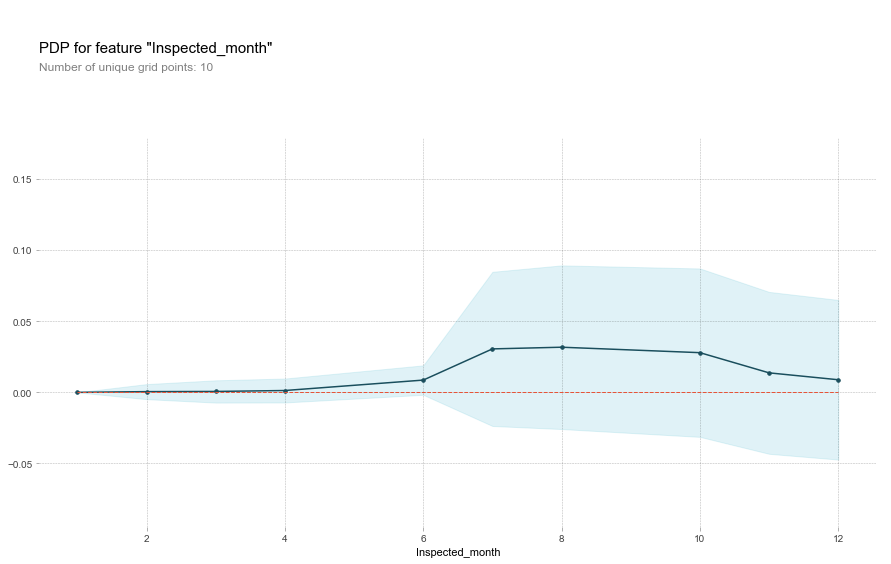

In [195]:
pdp_plot(pdp_isolated, 'Inspected_month')

The most likely month for a violation is the holiday months, probably due to the increased supply of customers and stress. 